<a href="https://colab.research.google.com/github/janiesilva/data_science/blob/master/Airbnb_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Análise de dados - Airbnb New York**
*by [Janie silva](https://www.linkedin.com/in/janie-silva-7501ba142/)*

---

Se você parou nesse post, provavelmente deve ter lido meu primeiro material, que avalia as composições de preço do Airbnb no Rio de Janeiro. Não sabe do que estou falando? Sugiro a leitura [nesse link aqui] (inserir link do linkedin).

Para quem está chegando agora, nesse projeto o foco é avaliar o comportamento dos preços nas locações do Airbnb na cidade de New York - EUA. Ficou curioso? Vem comigo! 
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**! Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*


In [ ]:
# Começamos importando os pacotes necessarios para esse trabalho
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [6]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-06-08/visualisations/listings.csv")

### Análise dos Dados 
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Mais a frente, veremos a linha de código que expressa como conseguimos listar essas variáveis. Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [7]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335
2,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,322,2020-06-07,4.64,1,276
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. 

In [8]:
# identificando o volume de Dados do Dataframe:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as colunas entradas do dataset
display(df.dtypes)

Entradas:	 49530
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

**Muito diferente do que fora visto com os dados do Rio de Janeiro**, o dataset de New York tem pouquíssimos valores nulos, sendo os maiores na casa dos 23%, e em indicadores que não utilizaremos em nossas análises. Por enquanto, não sexiste justificativa para criarmos a versão limpa (`df_clear`) do nosso dataset.



In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.228528
last_review                       0.228528
name                              0.000363
host_name                         0.000121
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis de forma mais visual, faremos uso de um histograma. O número de colunas da distribuição foi escolhido aleatoriamente, apenas como parte da análise exploratória dos dados.

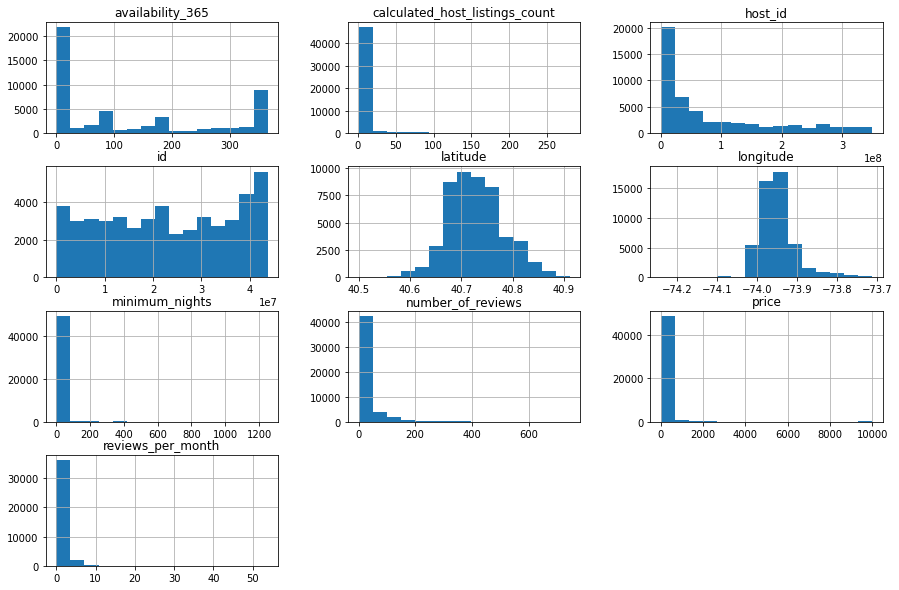

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. É possível identificar a presença de outliers?** 

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*, de maneira bem mais branda que no caso do Rio de Janeiro. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [11]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,49530.000000,49530.000000,49530.000000,38211.000000,49530.000000,49530.000000
mean,162.643872,8.191540,23.867515,1.008095,6.233030,126.666848
std,419.312316,21.974833,48.245823,1.345213,25.485293,142.381428
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,101.000000,3.000000,5.000000,0.450000,1.000000,79.000000
75%,175.000000,6.000000,23.000000,1.420000,2.000000,267.000000
max,10000.000000,1250.000000,746.000000,53.800000,280.000000,365.000000


O resumo nos mostra algumas similaridades com o case do Rio de Janeiro, como: 

* A variável `price` possui 75% do valor abaixo de 175, porém seu valor máximo é USS 10.000,00. Com certeza, um valor bem mais moderado que a diária de RS 131.000,00 no Rio de Janeiro, mas vale irmos além no caso;
* O desvio padrão está muito melhor ajustado que o do RJ! 
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano. Vamos a uma análise detalhada dessa distribuição! 

#### Boxplot para minimum_nights

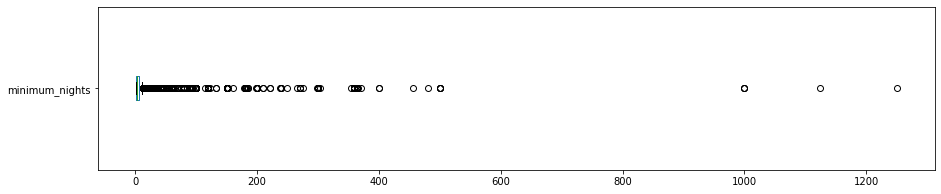

minimum_nights: valores acima de 30:
827 entradas
1.6697%


In [12]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

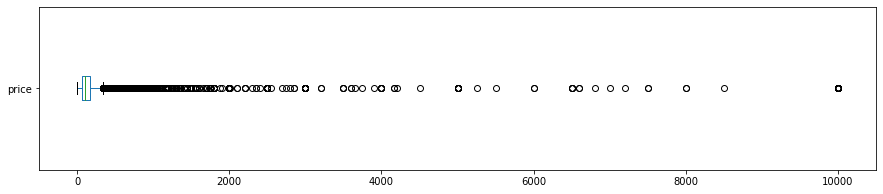


price: valores acima de 1500
214 entradas
0.4321%


In [13]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Como tratar os outliers
Diferente da situação do Rio de Janeiro, no qual os outliers insinuavam um possível erro de cadastro no site, que poderiam levar a análises errôneas; aqui os dados parecem mais coerentes, conforme o comentado anteriormente a partir do pouco volume de células vazias e com os valores de desvio padrão mais ajustados à média. Nessa análise, não faremos uso da versão limpa do dataframe, pois consideramos que os dados crus já estão prontos para consumo e fidedignos à realidade da cidade de New York.

### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [14]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.015923,-0.035700,-0.011623,0.004730,0.055788
minimum_nights,0.015923,1.000000,-0.079192,-0.098409,0.165421,0.148435
number_of_reviews,-0.035700,-0.079192,1.000000,0.723568,-0.075955,0.191785
reviews_per_month,-0.011623,-0.098409,0.723568,1.000000,-0.066725,0.213093
calculated_host_listings_count,0.004730,0.165421,-0.075955,-0.066725,1.000000,0.173181
availability_365,0.055788,0.148435,0.191785,0.213093,0.173181,1.000000


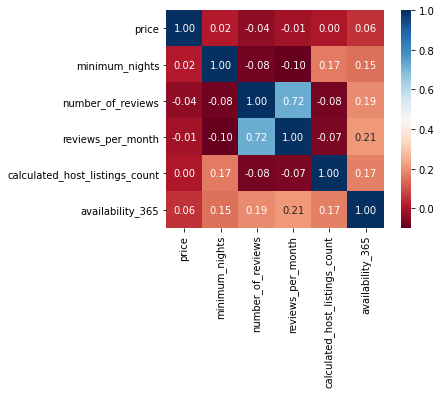

In [15]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    25716
Private room       22279
Shared room         1104
Hotel room           431
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.519200
Private room       0.449808
Shared room        0.022290
Hotel room         0.008702
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de New York**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os `bairros (neighbourhoods)` a partir do preço de locação.

In [18]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Woodrow              2350.000000
Manhattan Beach       926.750000
Fort Wadsworth        800.000000
Prince's Bay          506.666667
Midtown               484.124925
Theater District      471.547945
Tribeca               414.434146
Sea Gate              369.076923
Riverdale             337.000000
Flatiron District     332.506494
Name: price, dtype: float64

Algum desavisado, que, como eu, conhece NY apenas por filmes e seriados, pode ter a percepção de que os bairros mais caros e badalados são Brooklyn, Upper East Side, Queens e SoHo... será que essa percepção está errada? Nossa vida foi uma mentira? 

Vamos descobrir se, ao modelo do que aconteceu no Rio de Janeiro, uma amostra não representativa está camuflando os reais resultados! 

In [19]:
# ver quantidade de imóveis em Woodrow
print(df[df.neighbourhood == "Woodrow"].shape)

# ver quantidade de imóveis em Manhattan Beach
print(df[df.neighbourhood == "Manhattan Beach"].shape)

# ver quantidade de imóveis em Fort Wadsworth
print(df[df.neighbourhood == "Fort Wadsworth"].shape)

# ver quantidade de imóveis em Prince's Bay 
print(df[df.neighbourhood == "Prince's Bay "].shape)

# ver quantidade de imóveis em Midtown
print(df[df.neighbourhood == "Midtown"].shape)

(2, 16)
(12, 16)
(1, 16)
(0, 16)
(1673, 16)


De fato, os quatro primeiros bairros mais caros tem baixa representatividade no nosso dataset, e com valores elevados! Porém, o bairro `Midtown` tem uma relevância considerável quando comparado aos seus pares... 

Um questionamento que se faz presente é: considerando os bairros que a autora julgava serem os mais caros, qual a média de preço verdadeira? Vamos verificar? 

In [ ]:
# lista de todos os bairros disponíveis

df["neighbourhood"].unique()

array(['Washington Heights', 'Midtown', 'Clinton Hill', 'Murray Hill',
       'Bedford-Stuyvesant', 'Sunset Park', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'West Village', 'South Slope',
       'Williamsburg', 'East Harlem', 'Fort Greene', 'Inwood',
       'East Village', 'Harlem', 'Bushwick', 'Flatbush',
       'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City',
       'Chelsea', 'Greenpoint', 'Kips Bay', 'Nolita', 'Upper East Side',
       'Red Hook', 'Prospect Heights', 'Park Slope', 'Woodside',
       'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands',
       'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside',
       'St. George', 'Tribeca', 'Highbridge', 'NoHo', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village',
       'Ditmars Steinway', 'Flatiron District', 'Windsor Terrace',
       'Roosevelt Island', 'SoHo', 'Greenwich Village', 'Little Italy',
       'Tompkinsville', 'Gramercy', 'Astoria', 'Kensington',
      

Para verificarmos a média de preços praticadas dos bairros mencionados, fazemos:


In [32]:
# ver média de preços em  Brooklyn
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)["Brooklyn Heights"]



211.93006993006992

In [33]:
# ver média de preços em  Queens 
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)["Queens Village"]


90.1969696969697

In [34]:
# ver média de preços em  SoHo
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)["SoHo"]


258.69017632241815

É possível notar que os bairros tidos, pela nossa hipótese, como mais requisitados, não são de fato os com o preço mais sobressalente.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

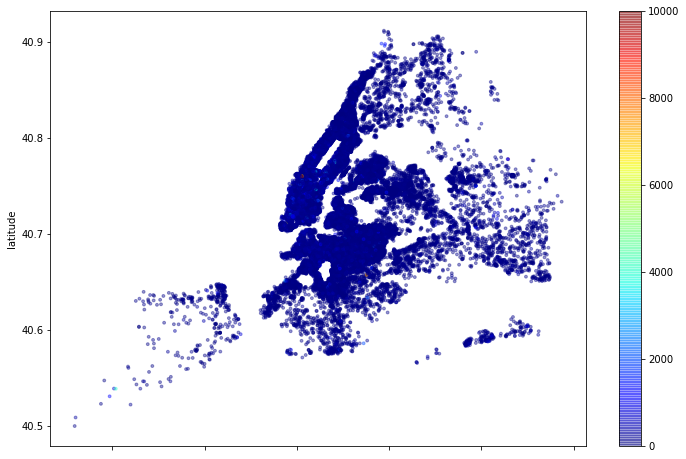

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões ##
Considerando que a idealização do projeto é a comparação da base de dados com a da cidade do Rio de Janeiro, algumas observações:
* Sendo a base da cidade de New York mais robusta, com mais dados, ela tem mais coesão e os outliers praticamente desaparecem em meio aos dados massivos no dataset. Isso implica em não ser mandatória e necessária a limpeza no dataset;
* Os desvios padrões desse conjunto de dados apresentavam mais coerência com a média, significando que existe menor distância entre os preços praticados aqui do que no estudo da cidade do Rio de Janeiro;
* O conhecimento prévio da autora trouxe hipóteses que foram descartadas com o uso de análise exploratória a partir do Airbnb. Porém não necessariamente esse estudo reproduza a realidade: talvez faça-se necessária uma abordagem de preço por m² nos imóveis em outras fontes, já que aqui tratamos de apenas uma plataforma de aluguel por temporada, enquanto existem outros modelos de hospedagem que possivelmente mostrem resultados diversos a esse;
* A hospedagem por temporada longa é muito mais frequente em NY que no Rio de Janeiro, onde a maior parte dos espaços tem período mais curto de estadia mínima.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, entretanto, em proporção muito menos que no estudo do Rio de Janeiro.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.